<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/J078_Remedial_Assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Remedial Assignment No : 1
#Roll No: J078

##Cars 1 Classification Problem

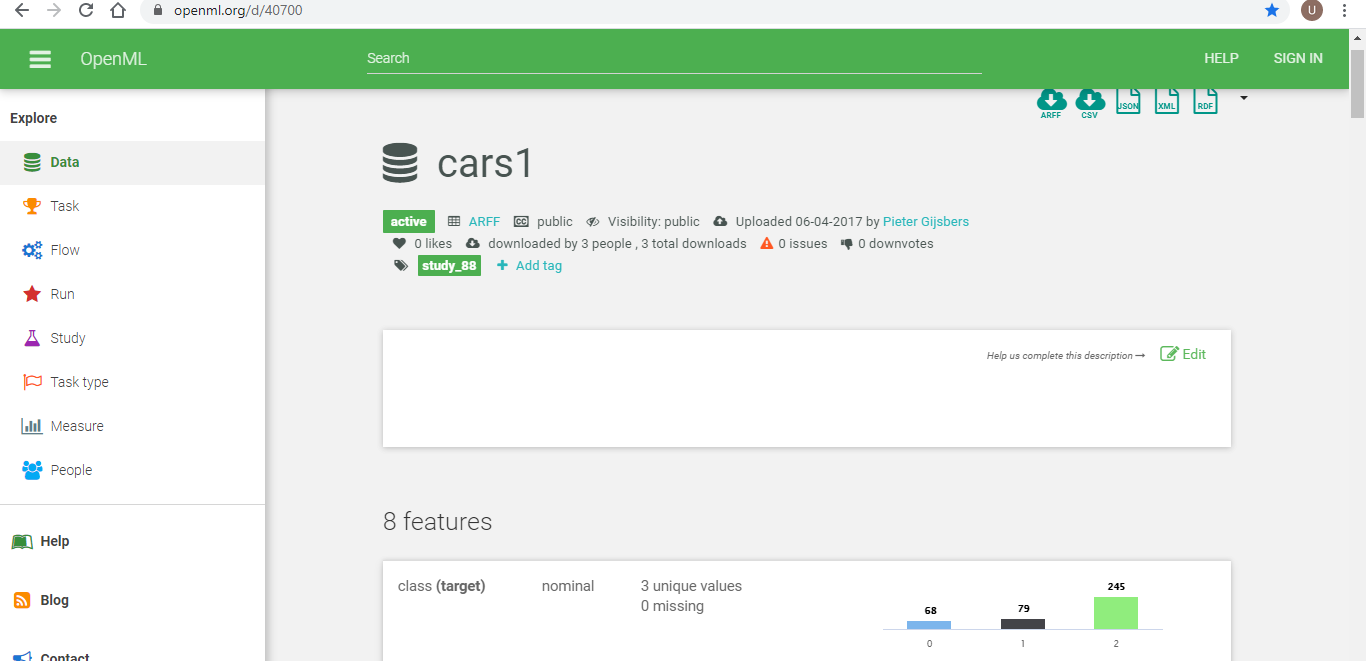

In [21]:
import pandas as pd

In [22]:
data=pd.read_csv("/content/cars1.csv")
data.head()

,MPG,cylinders,cubicInches,horsepower,weightLbs,time-to-sixty,year,class
0,14.0,8,350,165,4209,12,1972,2
1,31.9,4,89,71,1925,14,1980,0
2,17.0,8,302,140,3449,11,1971,2
3,15.0,8,400,150,3761,10,1971,2
4,30.5,4,98,63,2051,17,1978,2


In [23]:
data.isnull().sum()

MPG              0
cylinders        0
cubicInches      0
horsepower       0
weightLbs        0
time-to-sixty    0
year             0
class            0
dtype: int64

No missing value is there

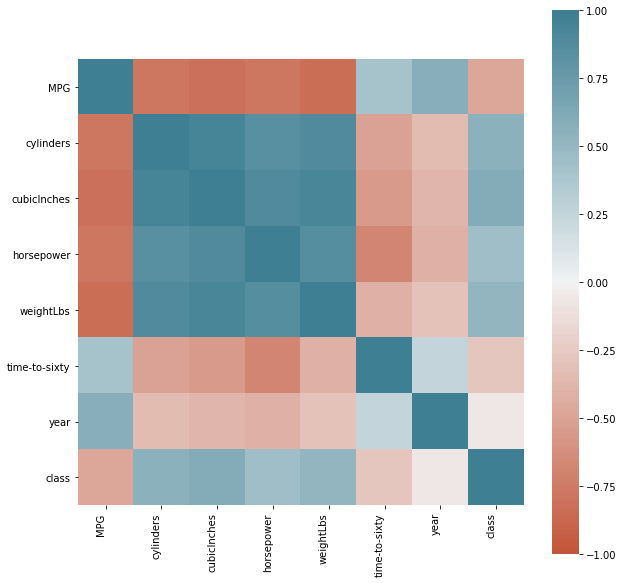

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

As no feature is highly correlated with the Class(Target Varaible) .....Hence will keep as  the features in the model

In [25]:
y=data.pop("class")
y.head()

0    2
1    0
2    2
3    2
4    2
Name: class, dtype: int64

In [26]:
X=data
X.head()

,MPG,cylinders,cubicInches,horsepower,weightLbs,time-to-sixty,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [27]:
extra=X.iloc[:,[1,5,6]]                
extra.head()

,cylinders,time-to-sixty,year
0,8,12,1972
1,4,14,1980
2,8,11,1971
3,8,10,1971
4,4,17,1978


In [28]:
X.drop(['cylinders','time-to-sixty','year'],axis=1,inplace=True)
X.head()

,MPG,cubicInches,horsepower,weightLbs
0,14.0,350,165,4209
1,31.9,89,71,1925
2,17.0,302,140,3449
3,15.0,400,150,3761
4,30.5,98,63,2051


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(X)
X_stand=pd.DataFrame(X_stand)
X_stand.head()

,0,1,2,3
0,-1.211785,1.488736,1.574594,1.451596
1,1.084545,-1.008650,-0.870646,-1.240789
2,-0.826925,1.029447,0.924265,0.555706
3,-1.083498,1.967163,1.184397,0.923493
4,0.904944,-0.922533,-1.078751,-1.092260


In [30]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
extra['cylinders']= label_encoder.fit_transform(extra["cylinders"]) 
extra['time-to-sixty']= label_encoder.fit_transform(extra["time-to-sixty"]) 
extra['year']= label_encoder.fit_transform(extra["year"]) 
extra.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,cylinders,time-to-sixty,year
0,4,4,1
1,1,6,9
2,4,3,0
3,4,2,0
4,1,9,7


In [31]:
X1 = pd.concat([X_stand,extra], axis=1)
X1.head()

,0,1,2,3,cylinders,time-to-sixty,year
0,-1.211785,1.488736,1.574594,1.451596,4,4,1
1,1.084545,-1.008650,-0.870646,-1.240789,1,6,9
2,-0.826925,1.029447,0.924265,0.555706,4,3,0
3,-1.083498,1.967163,1.184397,0.923493,4,2,0
4,0.904944,-0.922533,-1.078751,-1.092260,1,9,7


In [32]:
import numpy as np

In [33]:
Y = pd.get_dummies(y)
Y

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
387,0,0,1
388,0,0,1
389,0,0,1
390,1,0,0


In [42]:
from sklearn.model_selection import train_test_split
seed=16
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=test_size, random_state=seed)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (313, 7)
X_test Shape:  (79, 7)
y_train Shape:  (313, 3)
y_test Shape:  (79, 3)


In [43]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

initializer = keras.initializers.glorot_normal()
filepath = "Remedial_Assign1_Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, min_delta=0.01, baseline=0.99)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(512,activation="relu",input_shape=(7,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(Dropout(0.5))
model1.add(layers.Dense(256,activation="relu", kernel_initializer=initializer, bias_initializer=initializer))
model1.add(Dropout(0.5))
model1.add(layers.Dense(128,activation="relu", kernel_initializer=initializer, bias_initializer=initializer))
model1.add(Dropout(0.5))
model1.add(layers.Dense(3,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [44]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history=model1.fit(X_train, y_train, epochs=150,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/150
1/8 [==>...........................] - ETA: 0s - loss: 1.8686 - accuracy: 0.2188
Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to Remedial_Assign1_Model.hdf5
8/8 [==============================] - 0s 28ms/step - loss: 1.2739 - accuracy: 0.4640 - val_loss: 0.8597 - val_accuracy: 0.6667
Epoch 2/150
1/8 [==>...........................] - ETA: 0s - loss: 1.0760 - accuracy: 0.6250
Epoch 00002: val_accuracy improved from 0.66667 to 0.69841, saving model to Remedial_Assign1_Model.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 0.9502 - accuracy: 0.6240 - val_loss: 0.8019 - val_accuracy: 0.6984
Epoch 3/150
1/8 [==>...........................] - ETA: 0s - loss: 1.0076 - accuracy: 0.5000
Epoch 00003: val_accuracy did not improve from 0.69841
8/8 [==============================] - 0s 6ms/step - loss: 0.8676 - accuracy: 0.6080 - val_loss: 0.8224 - val_accuracy: 0.5556
Epoch 4/150
1/8 [==>...........................] - ETA: 0s - loss: 0.6955 - ac

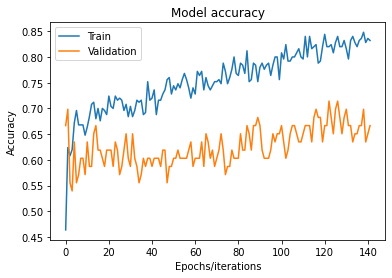

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

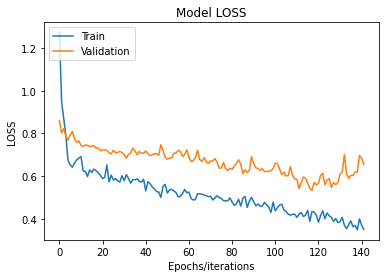

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [48]:
from keras.models import load_model
saved_model = load_model('Remedial_Assign1_Model.hdf5')
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.68354428
Test Loss: 0.687


Test Accuracy:  0.68354428

Test Loss: 0.687

Accuracy coming around ~ 80% in Training

Validation & Testing Dataset ~70%

Plot of accuracy of Train & Validation done above

Callback is used here to save the improved model.

Hyper-Parameter used here are:

1)Made 1st Layer of Relu Activation and the input dimension = 7 as 7 variables in dataset.

2)Added next 3 layers and output layers as nodes=3 as 3 classesin dataser

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 3 different classes

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=150



---

---



